In [3]:
import pandas as pd
import os

In [6]:
%run analysis_utils.py

In [24]:
def collect_auprc_scores(metric='AUPRC', clf='avg', base_dir='results'):
    all_results = []

    for subdir in os.listdir(base_dir):
        if subdir.startswith('__'):
            print(f'skipping {subdir}')
            continue
        exp_path = os.path.join(base_dir, subdir)
        file_path = os.path.join(exp_path, f'{metric}_{clf}.csv')
        if os.path.isfile(file_path):
            try:
                df = pd.read_csv(file_path)
                df['experiment_name'] = subdir  # Add experiment name
                all_results.append(df[['experiment_name', 'experiment', 'group', 'mean']])
            except Exception as e:
                print(f"Failed to read {file_path}: {e}")

    if not all_results:
        raise ValueError(f"No valid {metric} files found.")

    combined_df = pd.concat(all_results)
    return combined_df

In [25]:
auprc_df_avg = collect_auprc_scores(metric='AUPRC',clf='avg', base_dir='./metrics')
auprc_df_avg.group = auprc_df_avg.group.map(map_groups)
auprc_df_avg.experiment = auprc_df_avg.experiment.map(lambda x: model_name_map.get(x, x))
auprc_df_avg.to_csv('./metrics/auprc_avg.csv', index=False)

In [26]:
auprc_df_vote = collect_auprc_scores(metric='AUPRC',clf='vote', base_dir='./metrics')
auprc_df_vote.group = auprc_df_vote.group.map(map_groups)
auprc_df_vote.experiment = auprc_df_vote.experiment.map(lambda x: model_name_map.get(x, x))
auprc_df_vote.to_csv('./metrics/auprc_vote.csv', index=False)

In [27]:
auprc_df_mil = collect_auprc_scores(metric='AUPRC',clf='mil', base_dir='./metrics')
auprc_df_mil.group = auprc_df_mil.group.map(map_groups)
auprc_df_mil.experiment = auprc_df_mil.experiment.map(lambda x: model_name_map.get(x, x))
auprc_df_mil.to_csv('./metrics/auprc_mil.csv', index=False)

In [16]:
auprc_df_mil

,experiment_name,experiment,group,mean
0,brca_full_pre_post,GF-V2,Geneformer,0.980556
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.986667
2,brca_full_pre_post,GF-V2-Deep,Geneformer,1.000000
3,brca_full_pre_post,CellPLM,Other,0.962585
4,brca_full_pre_post,GF-V1,Geneformer,0.876787
5,brca_full_pre_post,HVG,Other,1.000000
6,brca_full_pre_post,PCA,Other,1.000000
7,brca_full_pre_post,scFoundation,Other,1.000000
8,brca_full_pre_post,scGPT,scGPT,0.656944
9,brca_full_pre_post,scGPT [cancer],scGPT,0.829894


In [52]:
model_name_map={
'hvg': 'HVG',
'pca': 'PCA',
'scgpt': 'scGPT', 
'scgpt_cancer': 'scGPT [cancer]',
'scvi':'scVI',
'gf-6L-30M-i2048': 'GF-V1',
'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
'Geneformer-V2-104M': 'GF-V2',
'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
'Geneformer-V2-316M': 'GF-V2-Deep',
'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

}

In [53]:
auprc_df_avg.model = auprc_df_avg.model.map(model_name_map)
auprc_df_vote.model = auprc_df_vote.model.map(model_name_map)
auprc_df_mil.model = auprc_df_mil.model.map(model_name_map)

In [54]:
# idx = auprc_df_mil.experiment_name=='luad1'
# auprc_df_mil = auprc_df_mil[~idx]

In [55]:
# idx = auprc_df_vote.experiment_name=='luad1'
# auprc_df_vote = auprc_df_vote[~idx]

In [56]:
# idx = auprc_df_avg.experiment_name=='luad1'
# auprc_df_avg = auprc_df_avg[~idx]

In [57]:
auprc_df_avg

,model,mean,experiment_name
0,HVG,0.973333,subtype
1,PCA,0.866667,subtype
2,scVI,0.896667,subtype
3,scGPT,0.851111,subtype
4,scGPT [cancer],0.966667,subtype
5,GF-V1,0.878889,subtype
6,GF-V2,0.961111,subtype
7,GF-V2 [cancer],1.000000,subtype
8,GF-V2-Deep,1.000000,subtype
9,HVG,0.458333,chemo


In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# Load data
df_avg = auprc_df_avg
df_vote = auprc_df_vote
df_mil = auprc_df_mil

# Add method labels
df_avg['method'] = 'avg'
df_vote['method'] = 'vote'
df_mil['method'] = 'mil'

# Combine data
df_combined = pd.concat([df_avg, df_vote, df_mil], ignore_index=True)

# Plotting
# Plotting
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df_combined, x='model', y='mean', hue='method')
# plt.title("Model Performance (AUPRC) Across Methods")
# plt.ylabel("AUPRC (mean)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid(axis='y')
# plt.show()
df_combined



,experiment_name,experiment,group,mean,method
0,brca_full_pre_post,GF-V2,Geneformer,0.962188,avg
1,brca_full_pre_post,GF-V2 [cancer],Geneformer,0.983333,avg
2,brca_full_pre_post,GF-V2-Deep,Geneformer,0.991667,avg
3,brca_full_pre_post,CellPLM,Other,0.893817,avg
4,brca_full_pre_post,GF-V1,Geneformer,0.940952,avg
...,...,...,...,...,...
175,brca_full_outcome,scFoundation,Other,0.833333,mil
176,brca_full_outcome,scGPT,scGPT,0.723333,mil
177,brca_full_outcome,scGPT [cancer],scGPT,0.640000,mil
178,brca_full_outcome,SCimilarity,Other,0.790000,mil


/var/tmp/ipykernel_4239/1645882576.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=df_combined, x='experiment', y='mean', hue='method', palette=palette)


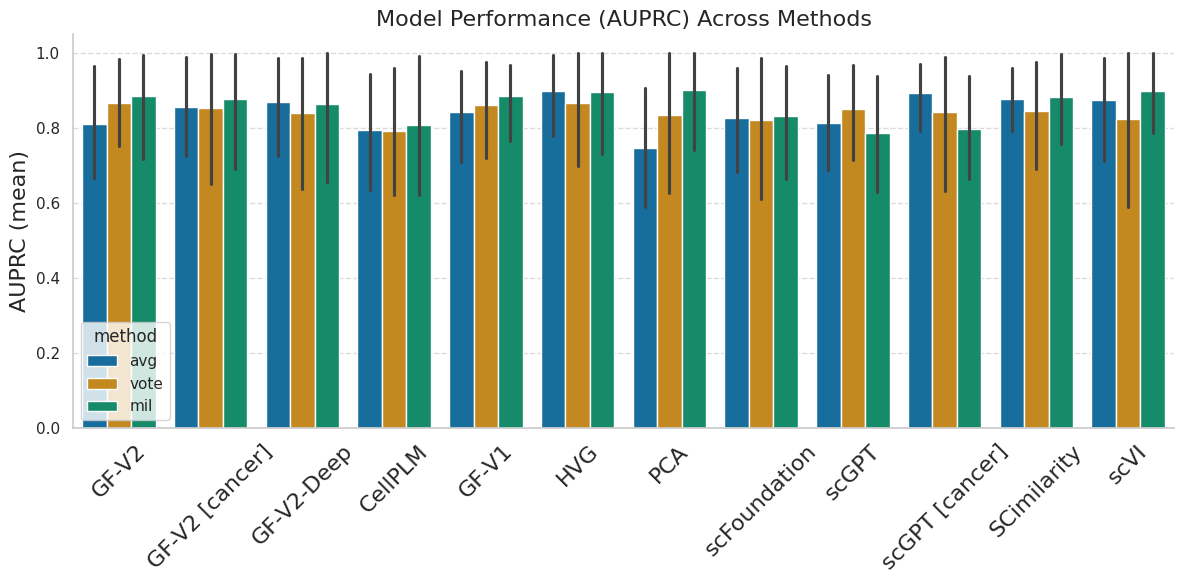

    Comparison  Statistic   P-Value
0  avg vs vote       35.0  0.791016
1   avg vs mil       22.0  0.203613
2  vote vs mil       19.0  0.129395


In [22]:
# Use a clean, colorblind-friendly palette
sns.set(style="whitegrid")
palette = sns.color_palette("colorblind")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_combined, x='experiment', y='mean', hue='method', palette=palette)

# Title and labels
plt.title("Model Performance (AUPRC) Across Methods", fontsize=16)
plt.ylabel("AUPRC (mean)", fontsize=16)
plt.xlabel("")  # remove x-label
plt.xticks(rotation=45, fontsize=16)

# Remove bounding box
sns.despine()

# Grid for y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('vote_mil_avg.png')
plt.show()

# Statistical testing
pivot_df = df_combined.pivot_table(index='experiment', columns='method', values='mean')
wilcoxon_avg_vote = wilcoxon(pivot_df['avg'], pivot_df['vote'])
wilcoxon_avg_mil = wilcoxon(pivot_df['avg'], pivot_df['mil'])
wilcoxon_vote_mil = wilcoxon(pivot_df['vote'], pivot_df['mil'])

# Summary table
summary_df = pd.DataFrame({
    'Comparison': ['avg vs vote', 'avg vs mil', 'vote vs mil'],
    'Statistic': [wilcoxon_avg_vote.statistic, wilcoxon_avg_mil.statistic, wilcoxon_vote_mil.statistic],
    'P-Value': [wilcoxon_avg_vote.pvalue, wilcoxon_avg_mil.pvalue, wilcoxon_vote_mil.pvalue]
})

print(summary_df)
